# sklearn linear regression

http://scikit-learn.org/stable/modules/linear_model.html

In [1]:
from sklearn import linear_model

In [2]:
reg = linear_model.LinearRegression()

In [3]:
type(reg)

sklearn.linear_model.base.LinearRegression

In [4]:
reg.fit([[0, 0], [1,1], [2, 2],], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
reg.coef_

array([ 0.5,  0.5])

In [6]:
reg.predict([[3, 3]])

array([ 3.])

In [7]:
reg.intercept_

1.1102230246251565e-16

#### Performance metrics

r2 or r squared

done on training and test datasets

## Quiz: Age/Net Worth Regression in sklearn

In [9]:
import numpy as np
import matplotlib
matplotlib.use('agg')
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
def studentReg(ages_train, net_worths_train):
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    reg = reg.fit(ages_train, net_worths_train)
    
    return reg
    

In [20]:
import random
def ageNetWorthData():
    random.seed(42)
    np.random.seed(42)
    
    ages = []
    for ii in range(100):
        ages.append(random.randint(20, 65))
    net_worths = [ii * 6.25 + np.random.normal(scale=40) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages = np.reshape(np.array(ages), (len(ages), 1))
    net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))
    
    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)
    
    return ages_train, ages_test, net_worths_train, net_worths_test

In [21]:
ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

/Users/alonavarshal/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
reg = studentReg(ages_train, net_worths_train)

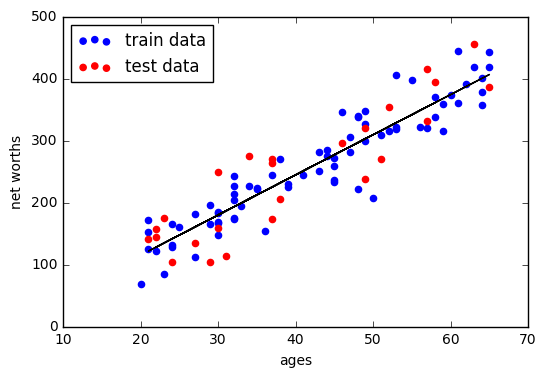

In [23]:
plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")

### Extracting Information from sklearn

Prediction:

In [24]:
print "Katie's net worth prediction: ", reg.predict([27]) # values in a list

Katie's net worth prediction:  [[ 160.43205453]]


/Users/alonavarshal/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [25]:
print "Slope: ", reg.coef_

Slope:  [[ 6.47354955]]


In [26]:
print "Intercept: ", reg.intercept_

Intercept:  [-14.35378331]


Stats on the dataset

In [27]:
print "r-squared score: ", reg.score(ages_test, net_worths_test)

r-squared score:  0.812365729231


Stats on the training dataset

In [28]:
print "r-squared score: ", reg.score(ages_train, net_worths_train)

r-squared score:  0.874588235822
